# computing best pokemon types

here we try to find what is the strongest pokemon type, looking exclusively at the type matchup chart.

we define strong using three principles:

1. a strong type has a high offensive score
2. a strong type has a low weakness score
3. a strong type has good scores against other strong types

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## gen 6 onwards

gen 6 introduced the fairy type to the game, which rebalanced the game considerably

In [2]:
# number of types
n_types = 18
n_iterations = 1000
weight_factor = .156
# weight_factor = .15762

In [3]:
#type enum
normal = 0
fighting = 1
flying = 2
poison = 3
ground = 4
rock = 5
bug = 6
ghost = 7
steel = 8
fire = 9
water = 10
grass = 11
electric = 12
psychic = 13
ice = 14
dragon = 15
dark = 16
fairy = 17
new = 18

In [151]:
types = ["normal", "fighting", "flying", "poison", "ground", "rock",
         "bug", "ghost", "steel", "fire", "water", "grass",
         "electric","psychic", "ice", "dragon", "dark", "fairy", "new"
]

colors = ["#a8a87c", '#c32d29', '#a990eb', '#a33f9c', '#e1c071', '#b9a045',
         '#a7b83c', '#715895', '#b8b8cf', '#f37f3a', '#6590eb', '#73c85e',
         '#fad04a', '#fc5586', '#94d8d8', '#7138f1', '#715849', '#f198ab', '#010101'
]

In [5]:
# effectiveness matrix
eff = np.array([
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [2.0, 1.0, 0.5, 0.5, 1.0, 2.0, 0.5, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5],
    [1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.5, 1.0, 2.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.5],
    [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 2.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5, 0.5, 2.0, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 0.5, 0.5, 2.0, 2.0, 0.5, 1.0, 0.5, 0.5, 2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0],
    [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5],
    [1.0, 2.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0],
])

In [128]:
weights = np.ones((n_iterations + 1, n_types))
scores = np.zeros((n_iterations, n_types))

def_weights = np.ones((n_iterations + 1, n_types))
def_scores = np.zeros((n_iterations, n_types))

off_weights = np.ones((n_iterations + 1, n_types))
off_scores = np.zeros((n_iterations, n_types))


for i in range(n_iterations):
    for j in range(n_types):
        # balanced scores are calculated with all scores
        scores[i][j] = np.dot(eff[j], weights[i]) - np.dot(eff[:, j], weights[i])
        weights[i+1][j] = 1 + scores[i][j] * weight_factor
        
        # defensive scores use offensive weights
        def_scores[i][j] = -np.dot(eff[:, j], off_weights[i])
        def_weights[i+1][j] = 1 + def_scores[i][j] / 20

        # offensive scores use defensive weights
        off_scores[i][j] = np.dot(eff[j], def_weights[i])
        off_weights[i+1][j] = 1 + off_scores[i][j] / 20
#         off_weights[i+1][j] = off_scores[i][j] / 20

In [7]:
# scores in the last iteration
final_scores_6 = pd.Series(data=scores[n_iterations-1], index=types)

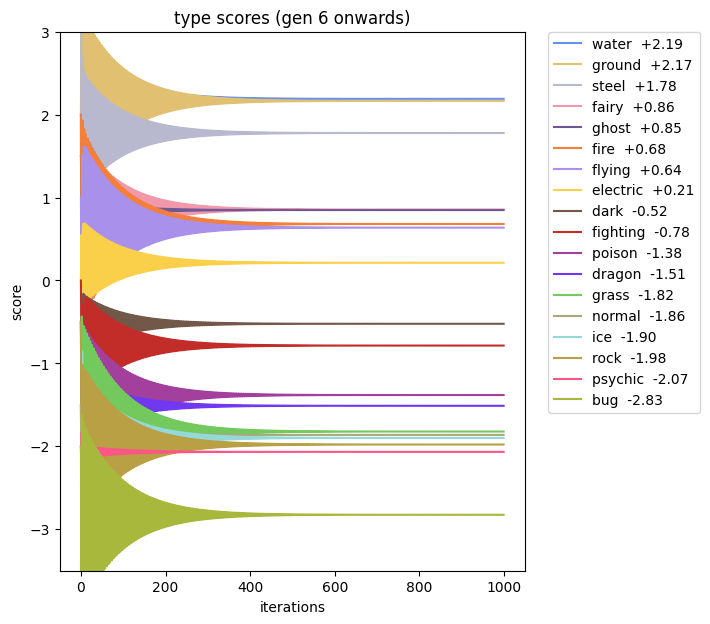

In [129]:
plt.figure(figsize=(6, 7))
for i in scores[n_iterations-1].argsort()[::-1]:
    plt.plot(scores[:, i], color=colors[i], label=f'{types[i]}  {scores[:, i][n_iterations-1]:+.2f}')

plt.ylim([-3.5, 3])
plt.title('type scores (gen 6 onwards)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

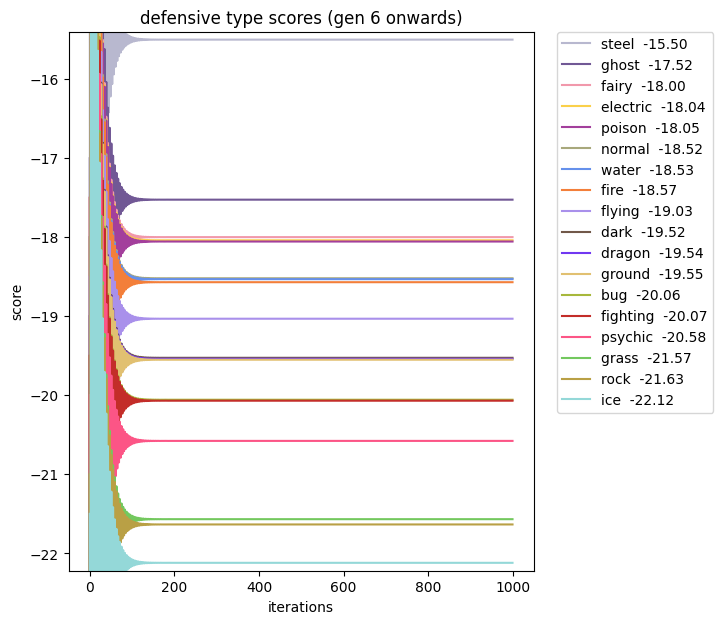

In [9]:
plt.figure(figsize=(6, 7))
for i in def_scores[n_iterations-1].argsort()[::-1]:
    plt.plot(def_scores[:, i], color=colors[i], label=f'{types[i]}  {def_scores[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(def_scores[:,][n_iterations-1])-.1, max(def_scores[:,][n_iterations-1])+.1])
plt.title('defensive type scores (gen 6 onwards)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

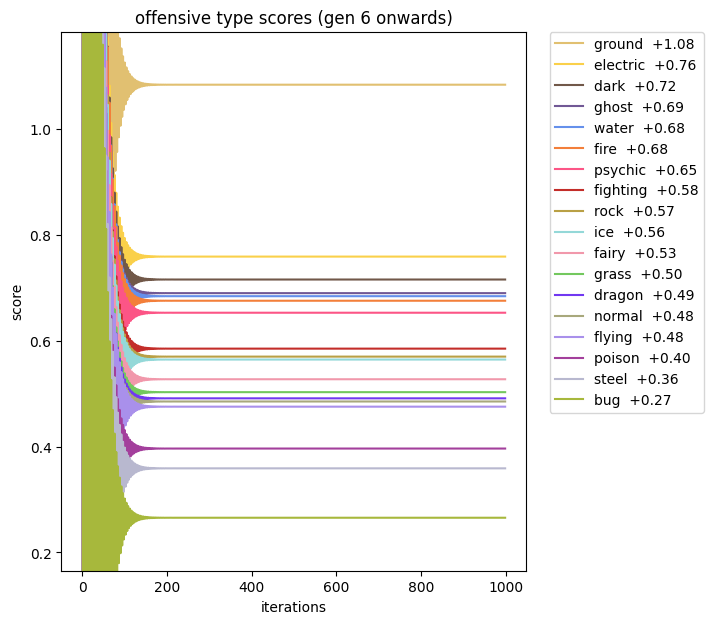

In [10]:
plt.figure(figsize=(6, 7))
for i in off_scores[n_iterations-1].argsort()[::-1]:
    plt.plot(off_scores[:, i], color=colors[i], label=f'{types[i]}  {off_scores[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(off_scores[:,][n_iterations-1])-.1, max(off_scores[:,][n_iterations-1])+.1])
plt.title('offensive type scores (gen 6 onwards)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## gen 5

without the fairy type, we should see considerable difference, mainly with the dragon type

In [11]:
n_types_5 = 17

In [12]:
weights_5 = np.ones((n_iterations + 1, n_types_5))
scores_5 = np.zeros((n_iterations, n_types_5))

def_weights_5 = np.ones((n_iterations + 1, n_types_5))
def_scores_5 = np.zeros((n_iterations, n_types_5))

off_weights_5 = np.ones((n_iterations + 1, n_types_5))
off_scores_5 = np.zeros((n_iterations, n_types_5))

for i in range(n_iterations):
    for j in range(n_types_5):
        # balanced scores are calculated with all scores
        scores_5[i][j] = np.dot(eff[j][:n_types_5], weights_5[i]) - np.dot(eff[:, j][:n_types_5], weights_5[i])
        weights_5[i+1][j] = 1 + scores_5[i][j] * weight_factor
        
        # defensive scores use offensive weights
        def_scores_5[i][j] = -np.dot(eff[:, j][:n_types_5], off_weights_5[i])
        def_weights_5[i+1][j] = 1 + def_scores_5[i][j] / 20

        # offensive scores use defensive weights
        off_scores_5[i][j] = np.dot(eff[j][:n_types_5], def_weights_5[i])
        off_weights_5[i+1][j] = 1 + off_scores_5[i][j] / 20

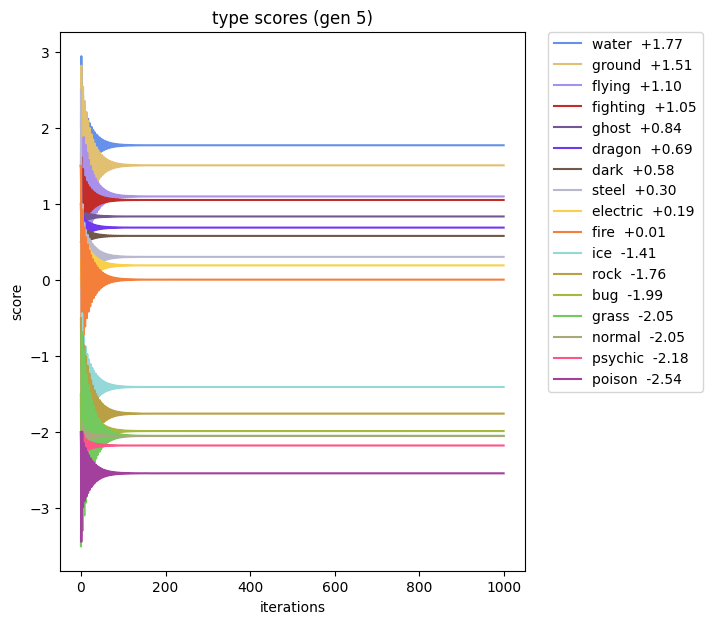

In [13]:
plt.figure(figsize=(6, 7))
for i in scores_5[n_iterations-1].argsort()[::-1]:
    plt.plot(scores_5[:, i], color=colors[i], label=f'{types[i]}  {scores_5[:, i][n_iterations-1]:+.2f}')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('type scores (gen 5)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.show()

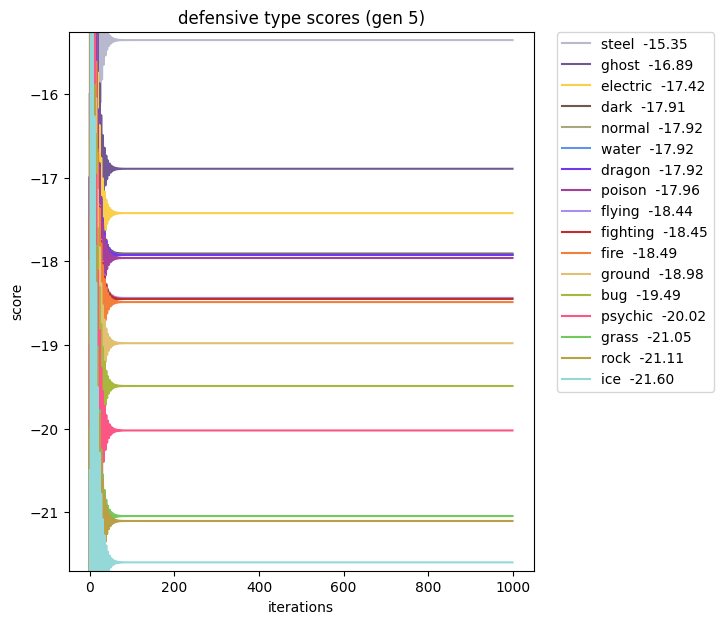

In [14]:
plt.figure(figsize=(6, 7))
for i in def_scores_5[n_iterations-1].argsort()[::-1]:
    plt.plot(def_scores_5[:, i], color=colors[i], label=f'{types[i]}  {def_scores_5[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(def_scores_5[:,][n_iterations-1])-.1, max(def_scores_5[:,][n_iterations-1])+.1])
plt.title('defensive type scores (gen 5)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

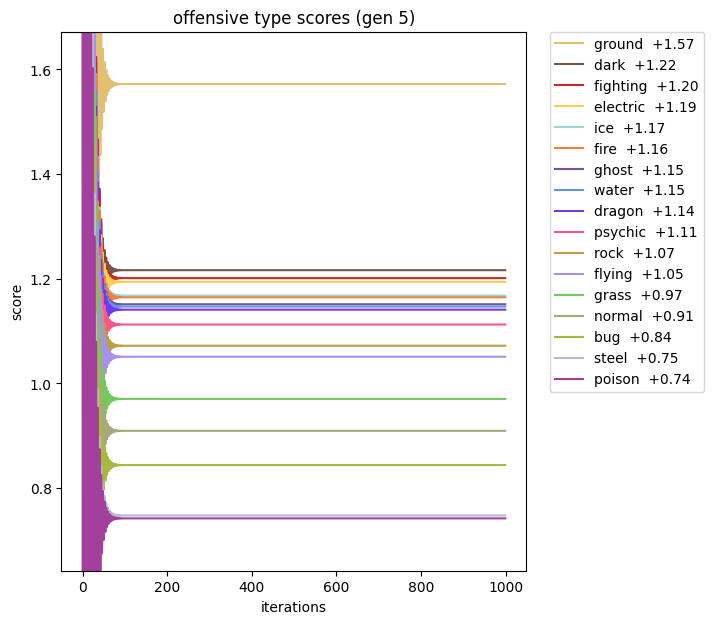

In [15]:
plt.figure(figsize=(6, 7))
for i in off_scores_5[n_iterations-1].argsort()[::-1]:
    plt.plot(off_scores_5[:, i], color=colors[i], label=f'{types[i]}  {off_scores_5[:, i][n_iterations-1]:+.2f}')

plt.ylim([min(off_scores_5[:,][n_iterations-1])-.1, max(off_scores_5[:,][n_iterations-1])+.1])
plt.title('offensive type scores (gen 5)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [16]:
# scores in the last iteration
final_scores_5 = pd.Series(data=scores_5[n_iterations-1], index=types[:n_types_5])

## position changes from 5 to 6

In [17]:
change = np.array(list(zip(final_scores_5, final_scores_6)))

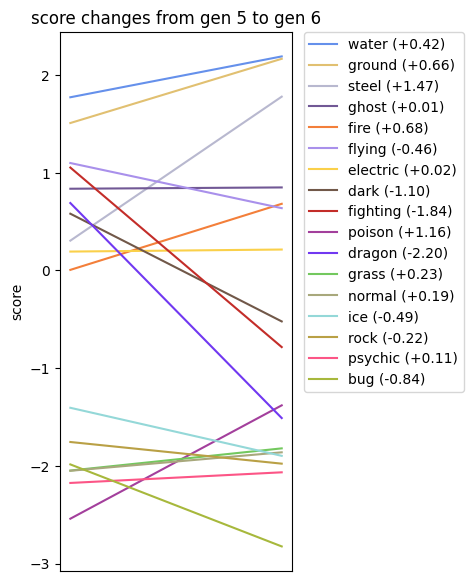

In [18]:
plt.figure(figsize=(3, 7))
for i in scores[n_iterations-1][:n_types_5].argsort()[::-1]:
    plt.plot(change[i], color=colors[i], label=f'{types[i]} ({change[i][1]-change[i][0]:+.2f})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('score changes from gen 5 to gen 6')
plt.tick_params(labelbottom=False, bottom=False)
plt.ylabel('score')
plt.show()

## which dual-typing is best

In [19]:
n_dual_types = int(n_types*(n_types+1)/2)

In [20]:
dual_eff = np.zeros((n_dual_types, n_dual_types))
dual_types = [''] * n_dual_types

# i_1: primary offensive typing
# i_1: secondary offensive typing
# j_1: primary defensive typing
# j_1: secondary defensive typing
i = 0
for i_1 in range(n_types):
    for i_2 in range(i_1, n_types, 1):
        dual_types[i] = f'{types[i_1]}-{types[i_2]}'
        j = 0
        for j_1 in range(n_types):
            for j_2 in range(j_1, n_types, 1):
                if j_1 == j_2:
                    dual_eff[i][j] = max(eff[i_1][j_1], eff[i_2][j_1])
                else:
                    eff_1 = eff[i_1][j_1] * eff[i_1][j_2]
                    eff_2 = eff[i_2][j_1] * eff[i_2][j_2]
                    dual_eff[i][j] = max(eff_1, eff_2)
                j += 1
        i += 1      

In [21]:
weights_dual = np.ones((n_iterations + 1, n_dual_types))
scores_dual = np.zeros((n_iterations, n_dual_types))

def_weights_dual = np.ones((n_iterations + 1, n_dual_types))
def_scores_dual = np.zeros((n_iterations, n_dual_types))

off_weights_dual = np.ones((n_iterations + 1, n_dual_types))
off_scores_dual = np.zeros((n_iterations, n_dual_types))

for i in range(n_iterations):
    for j in range(n_dual_types):
        scores_dual[i][j] = np.dot(dual_eff[j], weights_dual[i]) - np.dot(dual_eff[:, j], weights_dual[i])
        weights_dual[i+1][j] = 1 + scores_dual[i][j] * weight_factor * .078
        
        # defensive scores use offensive weights
        def_scores_dual[i][j] = -np.dot(dual_eff[:, j], off_weights_dual[i])
        def_weights_dual[i+1][j] = 1 + def_scores_dual[i][j] / 256

        # offensive scores use defensive weights
        off_scores_dual[i][j] = np.dot(dual_eff[j], def_weights_dual[i])
        off_weights_dual[i+1][j] = 1 + off_scores_dual[i][j] / 256

the following plots make the file size too big, so here we print just some text

In [22]:
# plt.figure(figsize=(6, 7))
# for i in scores_dual[n_iterations-1].argsort()[::-1]:
#     plt.plot(scores_dual[:, i], label=f'{dual_types[i]}  {scores_dual[:, i][n_iterations-1]:+.2f}')

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

pd.Series(scores_dual[n_iterations-1], index=dual_types).sort_values(ascending=False)

ground-water     50.581914
ground-fairy     43.611616
ground-steel     41.769854
flying-ground    41.110835
water-fairy      39.863622
                   ...    
rock-fire       -62.559838
normal-rock     -62.565847
rock-ice        -62.711448
dragon-dark     -64.491511
bug-grass       -99.821754
Length: 171, dtype: float64

In [23]:
# plt.figure(figsize=(6, 7))
# for i in def_scores_dual[n_iterations-1].argsort()[::-1]:
#     plt.plot(def_scores_dual[:, i], label=f'{dual_types[i]}  {def_scores_dual[:, i][n_iterations-1]:+.2f}')

# plt.ylim([min(def_scores_dual[:,][n_iterations-1])-10, max(def_scores_dual[:,][n_iterations-1])+10])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

pd.Series(def_scores_dual[n_iterations-1], index=dual_types).sort_values(ascending=False)

steel-fairy    -176.870429
flying-steel   -181.258171
steel-dragon   -183.726525
normal-ghost   -184.537700
ghost-dark     -186.982576
                   ...    
bug-ice        -313.784553
grass-ice      -316.739753
ground-rock    -332.965588
bug-grass      -335.964819
rock-ice       -339.417947
Length: 171, dtype: float64

In [24]:
# plt.figure(figsize=(6, 7))
# for i in off_scores_dual[n_iterations-1].argsort()[::-1]:
#     plt.plot(off_scores_dual[:, i], label=f'{dual_types[i]}  {off_scores_dual[:, i][n_iterations-1]:+.2f}')

# plt.ylim([min(off_scores_dual[:,][n_iterations-1])-1, max(off_scores_dual[:,][n_iterations-1])+1])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

pd.Series(off_scores_dual[n_iterations-1], index=dual_types).sort_values(ascending=False)

ground-electric    15.988885
ground-grass       14.624627
ground-dark        14.254121
ground-water       14.254040
ground-ghost       14.024287
                     ...    
fighting-bug        4.306593
flying-steel        4.026353
bug-steel           3.993514
steel-steel         3.530778
bug-bug             3.031094
Length: 171, dtype: float64

## introducing a new type that maximizes balance

here we use a genetical algorithm to search a set of effectiveness values for a new type that would minimize the mean square of all type scores

we don't include immunities in the search space for this new type because immunities would (probably) be very often selected by the algorithm, but in the game we know they are very rare (only 8 in total).

restrictions:
1. the new type will deal and receive neutral damage from the normal type, for consistency
2. the new type will have at most 5 super effectivenesses (the same as fighting and ground, the types with most super effectivenesses)
3. the new type will have at most 6 resistances (the same as fire, the type with the second most resistances -- steel has 11)

In [25]:
from geneticalgorithm import geneticalgorithm as ga

In [192]:
def print_matrix(m):
    for i, row in enumerate(m):
        print(f'{types[i]:10s}{" ".join(map(str, row))}')

In [275]:
def append_to_eff(X):
    column = np.array([[0.5 if x == 1 else 1.0 if x == 2 else 2.0 for x in X[n_types:]]]).transpose()
    column[0][0] = 1
    row = np.append([[1]], np.array([0.5 if x == 1 else 1.0 if x == 2 else 2.0 for x in X[:n_types]]))
    return np.append(np.append(eff, column, axis=1), [row], axis=0)

In [277]:
def objective_function(X):
    if np.array(X[:n_types] == 3.).sum() > 5 or np.array(X[n_types:] == 1.).sum() > 6:
        # 5 is larger than the usual numbers we see here
        return 5
    
    eff_new = append_to_eff(X)

    weights = np.ones((n_iterations//2 + 1, n_types+1))
    scores = np.zeros((n_iterations//2, n_types+1))

    for i in range(n_iterations//2):
        for j in range(n_types+1):
            scores[i][j] = np.dot(eff_new[j], weights[i]) - np.dot(eff_new[:, j], weights[i])
            weights[i+1][j] = 1 + scores[i][j] * .14 #weight_factor

    return np.mean((scores[n_iterations//2-1])**2)

 The best solution found:                                                                           
 [1. 3. 2. 2. 2. 1. 2. 3. 3. 3. 1. 1. 1. 1. 1. 2. 3. 2. 3. 1. 1. 3. 1. 3.
 3. 2. 2. 2. 2. 3. 1. 2. 2. 1. 2. 1.]

 Objective function:
 1.1607554336629944


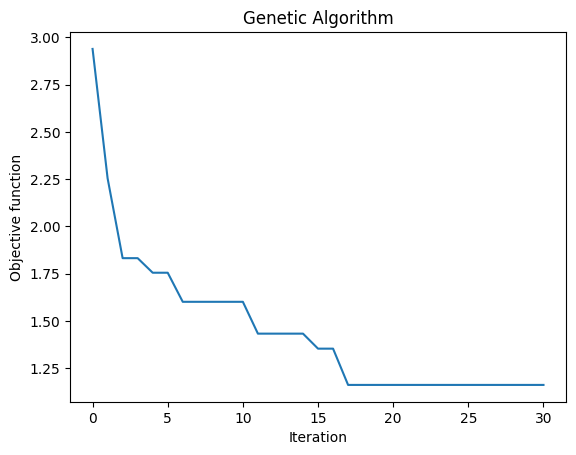

In [278]:
varbound = np.array([[1, 3]]*n_types*2)


algorithm_param = {'max_num_iteration': 30,
                   'population_size':100,
                   'mutation_probability':0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

model = ga(
    function=objective_function,
    dimension=n_types*2,
    variable_type='int',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param
)

model.run()

In [295]:
solution=model.best_variable

eff_new = append_to_eff(solution)
print_matrix(eff_new)

normal    1.0 1.0 1.0 1.0 1.0 0.5 1.0 0.0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
fighting  2.0 1.0 0.5 0.5 1.0 2.0 0.5 0.0 2.0 1.0 1.0 1.0 1.0 0.5 2.0 1.0 2.0 0.5 0.5
flying    1.0 2.0 1.0 1.0 1.0 0.5 2.0 1.0 0.5 1.0 1.0 2.0 0.5 1.0 1.0 1.0 1.0 1.0 0.5
poison    1.0 1.0 1.0 0.5 0.5 0.5 1.0 0.5 0.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0
ground    1.0 1.0 0.0 2.0 1.0 2.0 0.5 1.0 2.0 2.0 1.0 0.5 2.0 1.0 1.0 1.0 1.0 1.0 0.5
rock      1.0 0.5 2.0 1.0 0.5 1.0 2.0 1.0 0.5 2.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0
bug       1.0 0.5 0.5 0.5 1.0 1.0 1.0 0.5 0.5 0.5 1.0 2.0 1.0 2.0 1.0 1.0 2.0 0.5 2.0
ghost     0.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 0.5 1.0 1.0
steel     1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 0.5 0.5 0.5 1.0 0.5 1.0 2.0 1.0 1.0 2.0 1.0
fire      1.0 1.0 1.0 1.0 1.0 0.5 2.0 1.0 2.0 0.5 0.5 2.0 1.0 1.0 2.0 0.5 1.0 1.0 1.0
water     1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 2.0 0.5 0.5 1.0 1.0 1.0 0.5 1.0 1.0 1.0
grass     1.0 1.0 0.5 0.5 2.0 2.0 0.5 1.0 0.5 0.5 2.0 

In [296]:
weights_new = np.ones((n_iterations//2+1, n_types+1))
scores_new = np.zeros((n_iterations//2, n_types+1))

for i in range(n_iterations//2):
    for j in range(n_types+1):
        scores_new[i][j] = np.dot(eff_new[j], weights_new[i]) - np.dot(eff_new[:, j], weights_new[i])
        weights_new[i+1][j] = 1 + scores_new[i][j] * .15#weight_factor


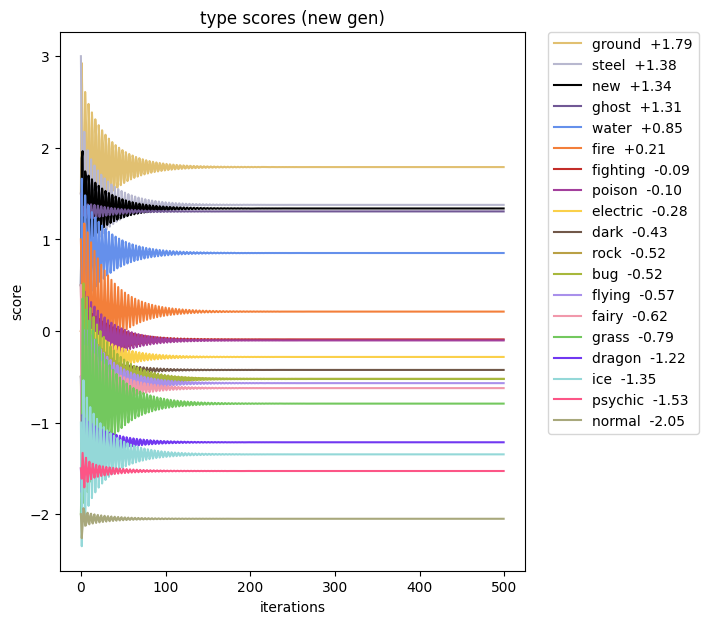

In [297]:
# scores in the last iteration
plt.figure(figsize=(6, 7))
for i in scores_new[n_iterations//2-1].argsort()[::-1]:
    plt.plot(scores_new[:, i], color=colors[i], label=f'{types[i]}  {scores_new[:, i][n_iterations//2-1]:+.2f}')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('type scores (new gen)')
plt.xlabel('iterations')
plt.ylabel('score')
plt.show()

In [298]:
final_scores_new = pd.Series(data=scores_new[n_iterations//2-1], index=types)
change = np.array(list(zip(final_scores_5, final_scores_6, final_scores_new)))

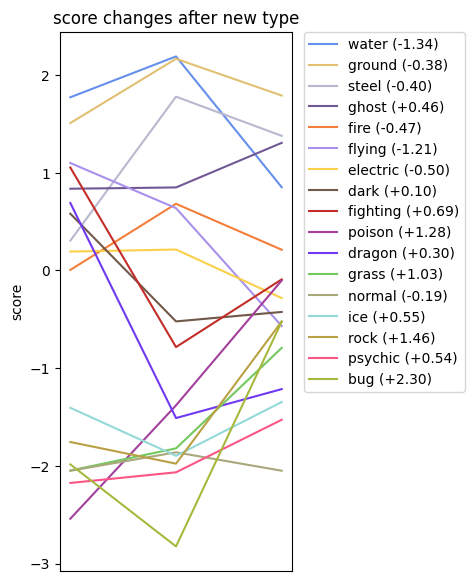

In [299]:
plt.figure(figsize=(3, 7))
for i in scores[n_iterations-1][:n_types_5].argsort()[::-1]:
    plt.plot(change[i], color=colors[i], label=f'{types[i]} ({change[i][2]-change[i][1]:+.2f})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('score changes after new type')
plt.tick_params(labelbottom=False, bottom=False)
plt.ylabel('score')
plt.show()